In [11]:
import quandl 
# Replace with your own Quandl API key
QUANDL_API_KEY = 'ja43bhBH89igZ11TdxtN'
quandl.ApiConfig.api_key = QUANDL_API_KEY  
df = quandl.get('EURONEXT/ABN')

df

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.180,18.430,18.000,18.350,38392898.0,7.003281e+08
2015-11-23,18.450,18.700,18.215,18.610,3352514.0,6.186446e+07
2015-11-24,18.700,18.800,18.370,18.800,4871901.0,8.994087e+07
2015-11-25,18.850,19.500,18.770,19.450,4802607.0,9.153862e+07
2015-11-26,19.480,19.670,19.410,19.430,1648481.0,3.220713e+07
...,...,...,...,...,...,...
2020-02-10,16.700,16.825,16.560,16.680,1770987.0,2.955897e+07
2020-02-11,16.750,16.950,16.730,16.885,2461546.0,4.151700e+07
2020-02-12,15.995,16.165,15.655,15.900,11705185.0,1.853654e+08


In [28]:
%matplotlib inline
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df_subset = quandl.get('EURONEXT/ABN', 
                       start_date = '2018-07-01',
                       end_date = '2018-07-31')

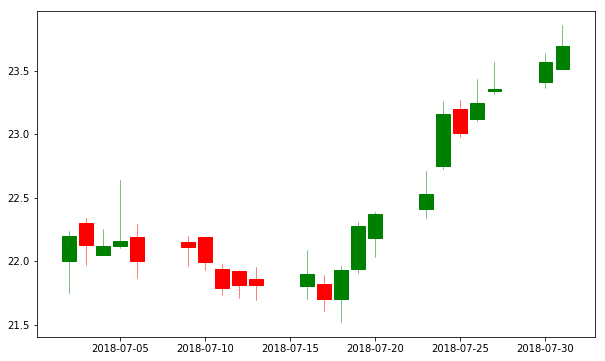

In [32]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (10,6))

formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                df_ohlc.values,
                width=0.8,
                colorup='green',
                colordown='red')
plt.show()

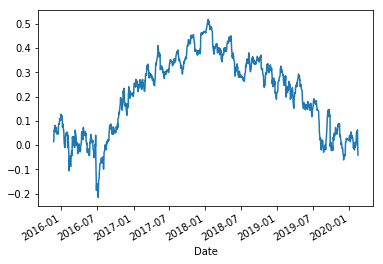

In [40]:
df = df['Last']
daily = df.pct_change()
daily.cumsum().plot()

# Daily volatility

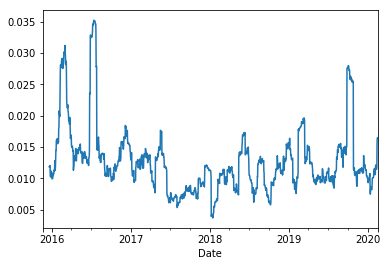

In [41]:
df_filled = df.asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std =df_returns.rolling(window=30, min_periods=30).std()
df_std.plot()

# Correlations

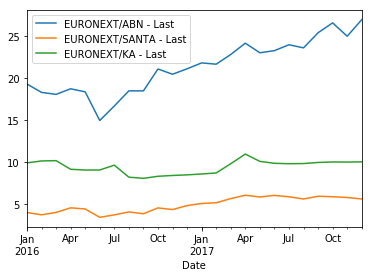

In [46]:
df = quandl.get(['EURONEXT/ABN.4',
                 'EURONEXT/SANTA.4',
                 'EURONEXT/KA.4'],
               collapse='monthly',
               start_date = '2016-01-01',
               end_date ='2017-12-31')
df.plot()

In [48]:
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000
